<a href="https://colab.research.google.com/github/PX2145-2025/week-9-b-Lester-Finley/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Exercise 1 & 2**

Calculated Period T: 198.69


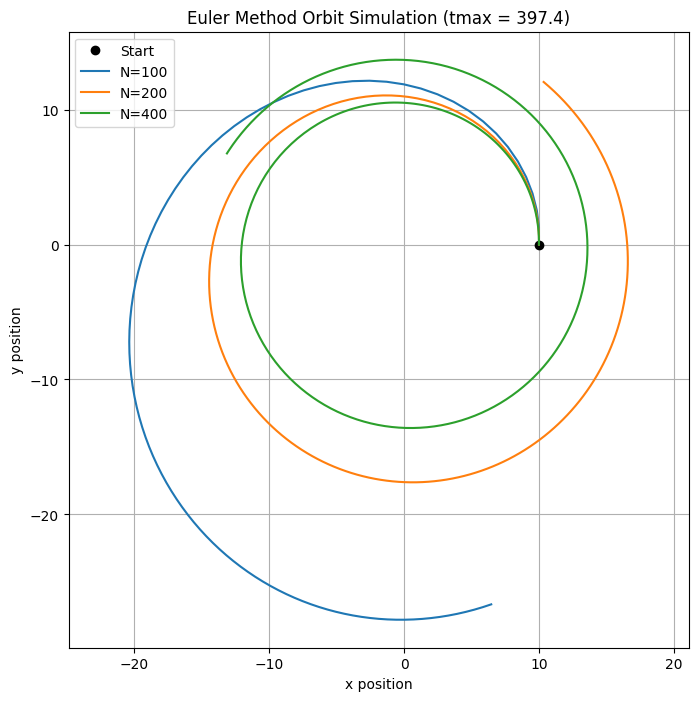

In [5]:
def orbit_solve(r0, v0, tmax, N, method='euler'):
    dt = tmax / (N - 1)
    t = np.linspace(0, tmax, N)
    r = np.zeros((N, len(r0)))
    v = np.zeros((N, len(v0)))
    r[0] = r0
    v[0] = v0
    GM = 1.0
    for i in range(0, N-1):
        r_mag = np.linalg.norm(r[i])
        a = -GM * r[i] / (r_mag**3)
        r[i+1] = r[i] + v[i] * dt
        v[i+1] = v[i] + a * dt
    return t, r, v

G = 1
M = 1
R = 10.0

v_mag = np.sqrt((G * M) / R)
r0 = np.array([R, 0])
v0 = np.array([0, v_mag])

T = 2 * np.pi * R / v_mag
print(f"Calculated Period T: {T:.2f}")

tmax = 2 * T

N_values = [100, 200, 400]
results = {}

for N in N_values:
    t, r, v = orbit_solve(r0, v0, tmax, N)
    results[N] = r

plt.figure(figsize=(8, 8))

plt.plot(r0[0], r0[1], 'ko', label='Start')

for N in N_values:
    r_data = results[N]
    plt.plot(r_data[:, 0], r_data[:, 1], label=f'N={N}')

plt.xlabel('x position')
plt.ylabel('y position')
plt.title(f'Euler Method Orbit Simulation (tmax = {tmax:.1f})')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# **Exercise 3**

In [7]:
import numpy as np

def orbit_solve(r0, v0, tmax, N, method='euler'):
    dt = tmax / (N - 1)
    t = np.linspace(0, tmax, N)
    r = np.zeros((N, len(r0)))
    v = np.zeros((N, len(v0)))
    r[0] = r0
    v[0] = v0

    GM = 1.0
    for i in range(0, N-1):
        r_mag = np.linalg.norm(r[i])
        a_i = -GM * r[i] / (r_mag**3)

        if method == 'euler':
            r[i+1] = r[i] + v[i] * dt
            v[i+1] = v[i] + a_i * dt

        elif method == 'euler-cromer':
            v[i+1] = v[i] + a_i * dt
            r[i+1] = r[i] + v[i+1] * dt

        elif method == 'verlet':
            r[i+1] = r[i] + v[i] * dt + 0.5 * a_i * (dt**2)
            r_next_mag = np.linalg.norm(r[i+1])
            a_next = -GM * r[i+1] / (r_next_mag**3)
            v[i+1] = v[i] + 0.5 * (a_i + a_next) * dt

    return t, r, v

# **Exercise 4**

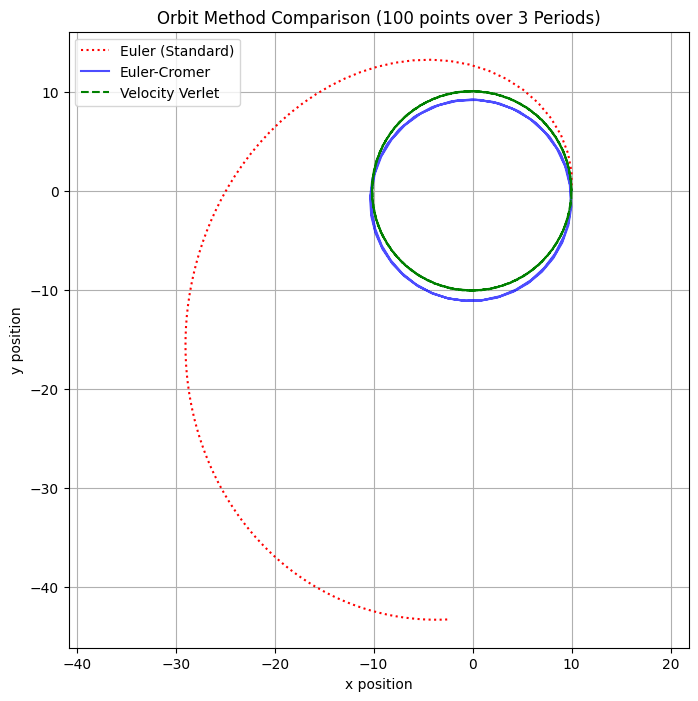

In [13]:
G, M = 1.0, 1.0
R = 10.0
v_circ = np.sqrt(G * M / R)

r0 = np.array([R, 0])
v0 = np.array([0, v_circ])

T = 2 * np.pi * R / v_circ
tmax = 3 * T
N = 100

_, r_euler, _ = orbit_solve(r0, v0, tmax, N, method='euler')

_, r_ec, _ = orbit_solve(r0, v0, tmax, N, method='euler-cromer')

_, r_verlet, _ = orbit_solve(r0, v0, tmax, N, method='verlet')

plt.figure(figsize=(8, 8))
plt.plot(r_euler[:, 0], r_euler[:, 1], label='Euler (Standard)', linestyle=':', color='red')
plt.plot(r_ec[:, 0], r_ec[:, 1], label='Euler-Cromer', color='blue', alpha=0.7)
plt.plot(r_verlet[:, 0], r_verlet[:, 1], label='Velocity Verlet', linestyle='--', color='green')
plt.title(f'Orbit Method Comparison ({N} points over 3 Periods)')
plt.xlabel('x position')
plt.ylabel('y position')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

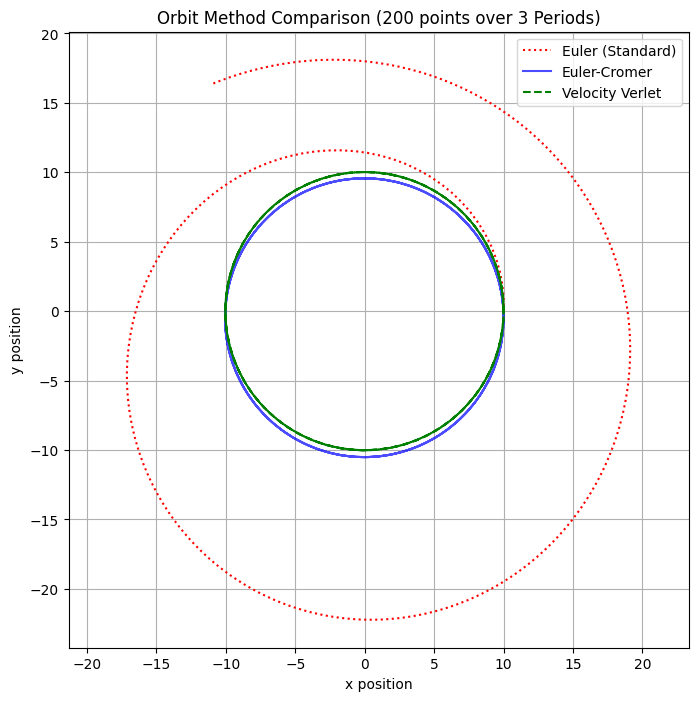

In [14]:
N = 200

_, r_euler, _ = orbit_solve(r0, v0, tmax, N, method='euler')

_, r_ec, _ = orbit_solve(r0, v0, tmax, N, method='euler-cromer')

_, r_verlet, _ = orbit_solve(r0, v0, tmax, N, method='verlet')

plt.figure(figsize=(8, 8))
plt.plot(r_euler[:, 0], r_euler[:, 1], label='Euler (Standard)', linestyle=':', color='red')
plt.plot(r_ec[:, 0], r_ec[:, 1], label='Euler-Cromer', color='blue', alpha=0.7)
plt.plot(r_verlet[:, 0], r_verlet[:, 1], label='Velocity Verlet', linestyle='--', color='green')
plt.title(f'Orbit Method Comparison ({N} points over 3 Periods)')
plt.xlabel('x position')
plt.ylabel('y position')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

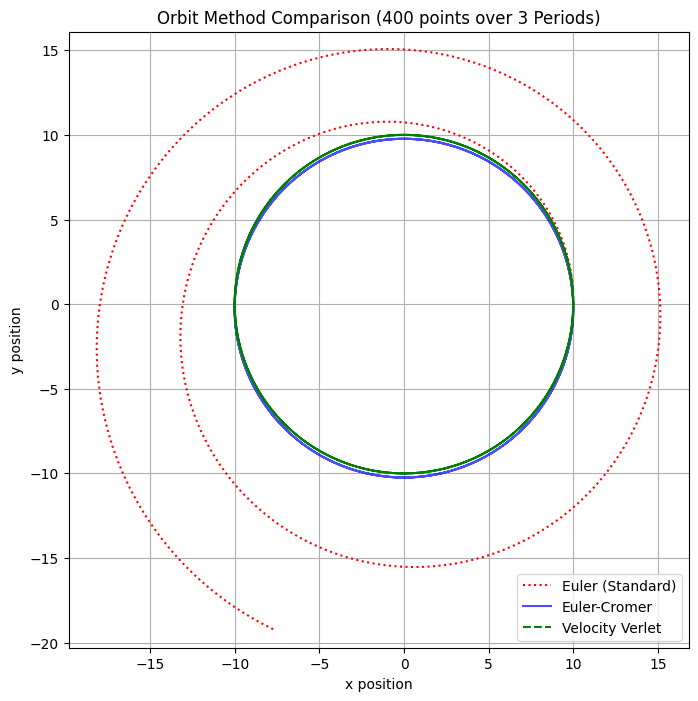

In [17]:
N = 400

_, r_euler, _ = orbit_solve(r0, v0, tmax, N, method='euler')

_, r_ec, _ = orbit_solve(r0, v0, tmax, N, method='euler-cromer')

_, r_verlet, _ = orbit_solve(r0, v0, tmax, N, method='verlet')

plt.figure(figsize=(8, 8))
plt.plot(r_euler[:, 0], r_euler[:, 1], label='Euler (Standard)', linestyle=':', color='red')
plt.plot(r_ec[:, 0], r_ec[:, 1], label='Euler-Cromer', color='blue', alpha=0.7)
plt.plot(r_verlet[:, 0], r_verlet[:, 1], label='Velocity Verlet', linestyle='--', color='green')
plt.title(f'Orbit Method Comparison ({N} points over 3 Periods)')
plt.xlabel('x position')
plt.ylabel('y position')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()